蚁群初始化完成。
开始第 1 次迭代


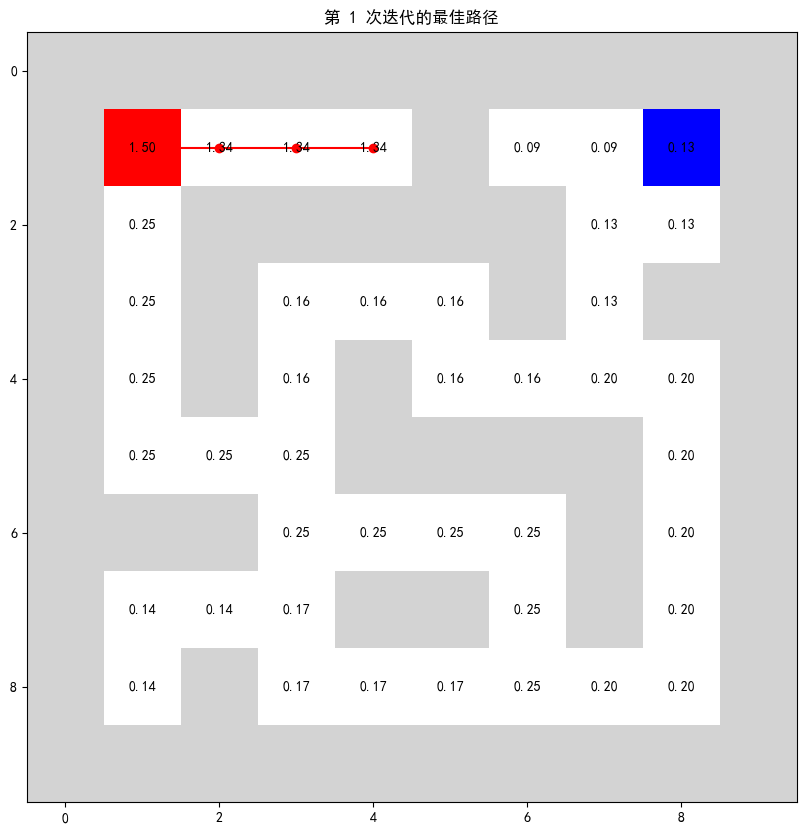

开始第 2 次迭代


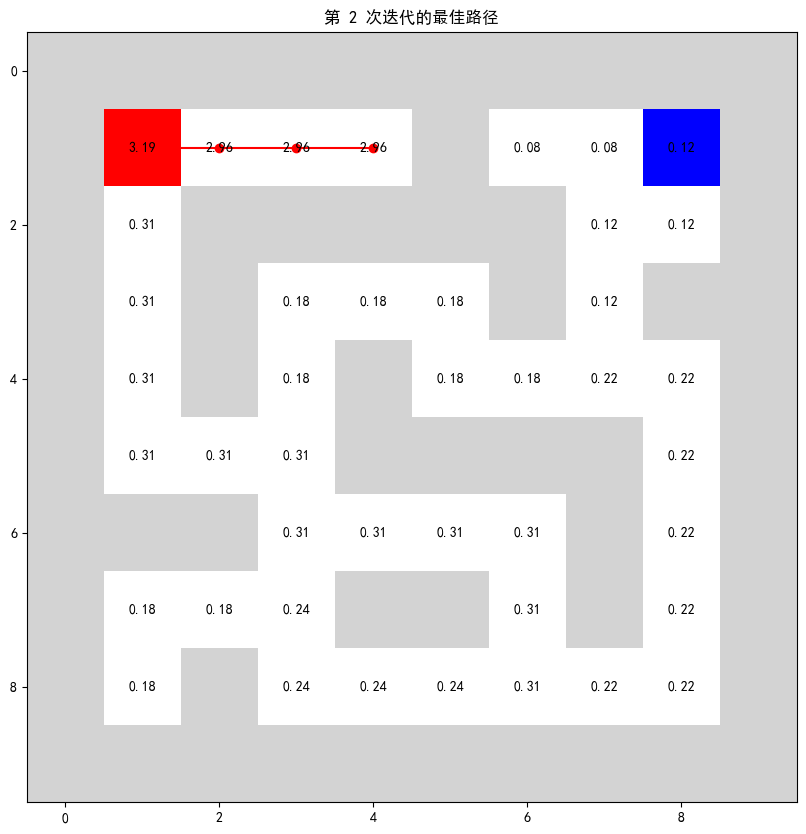

开始第 3 次迭代


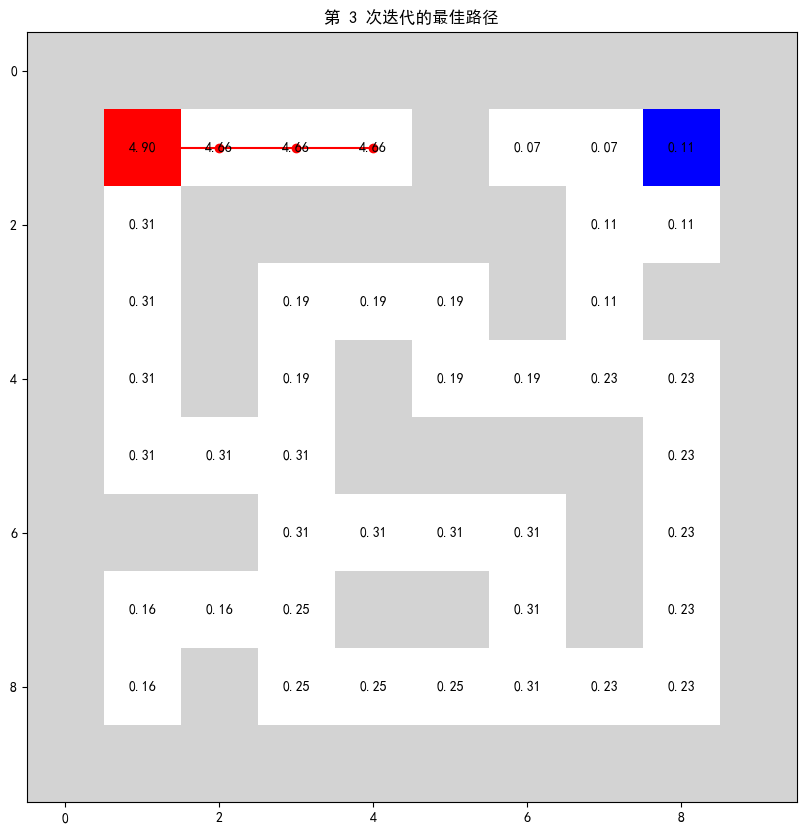

开始第 4 次迭代


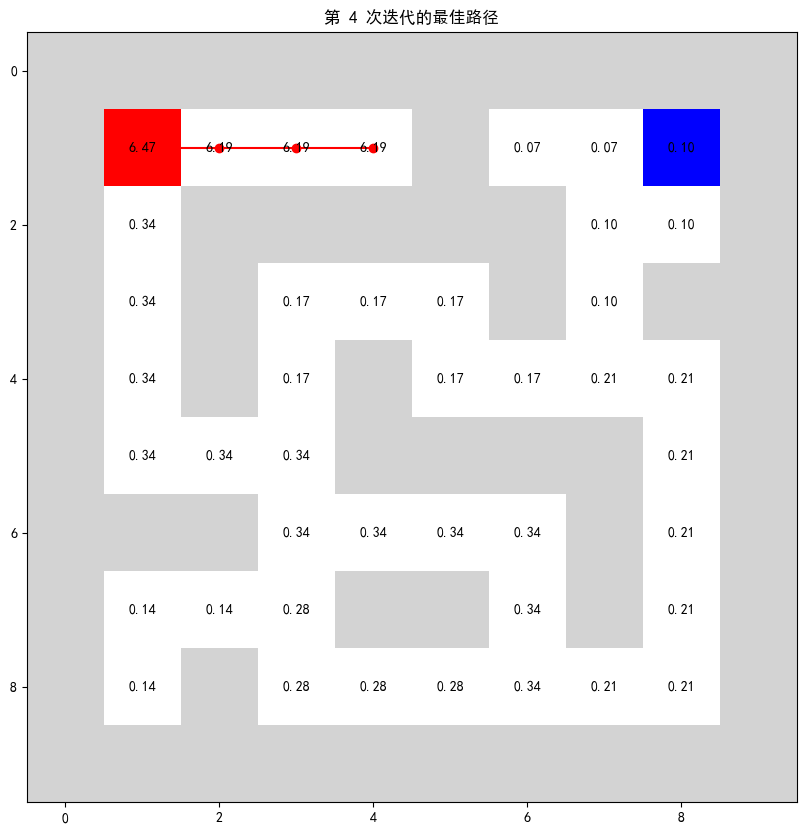

开始第 5 次迭代


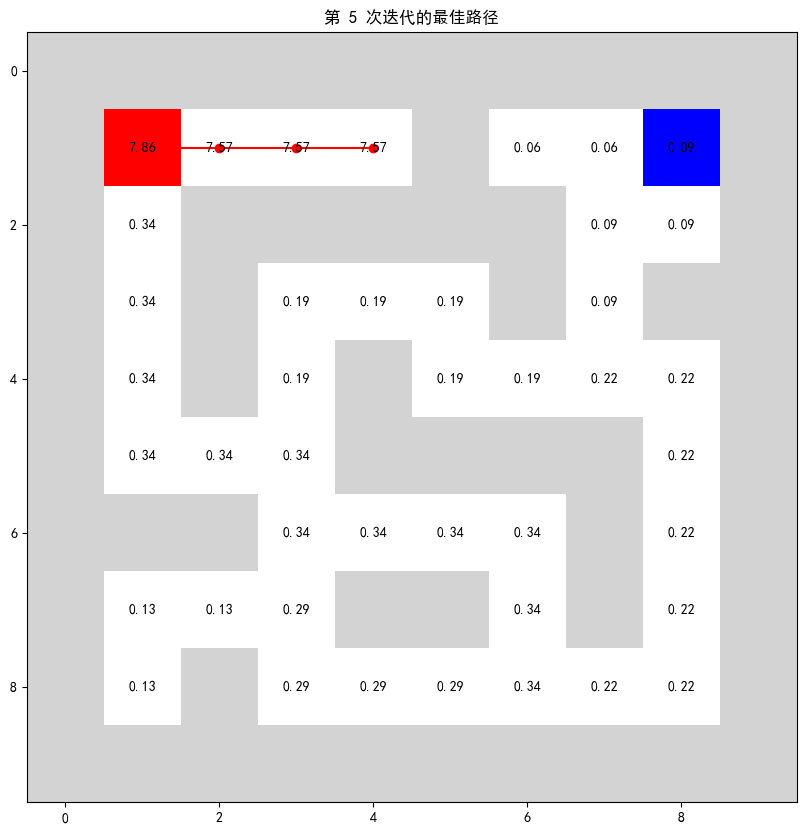

开始第 6 次迭代


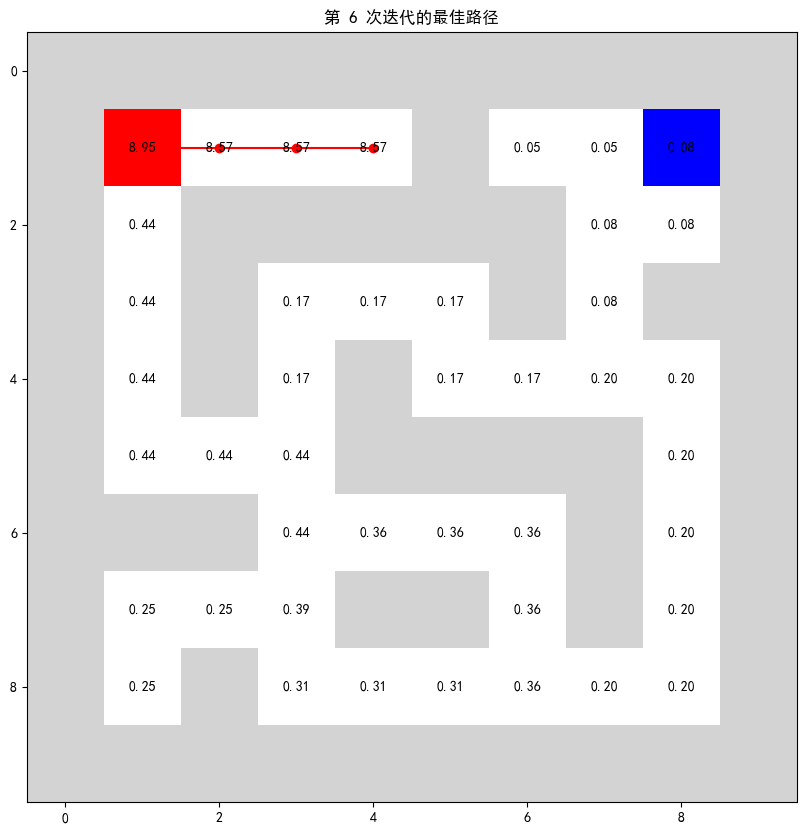

开始第 7 次迭代


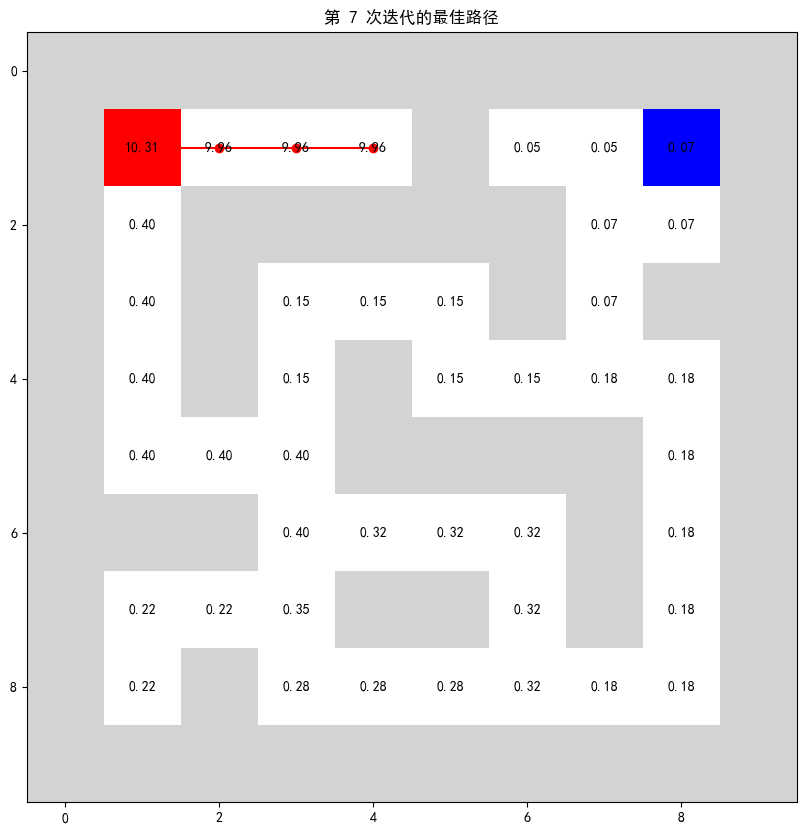

开始第 8 次迭代


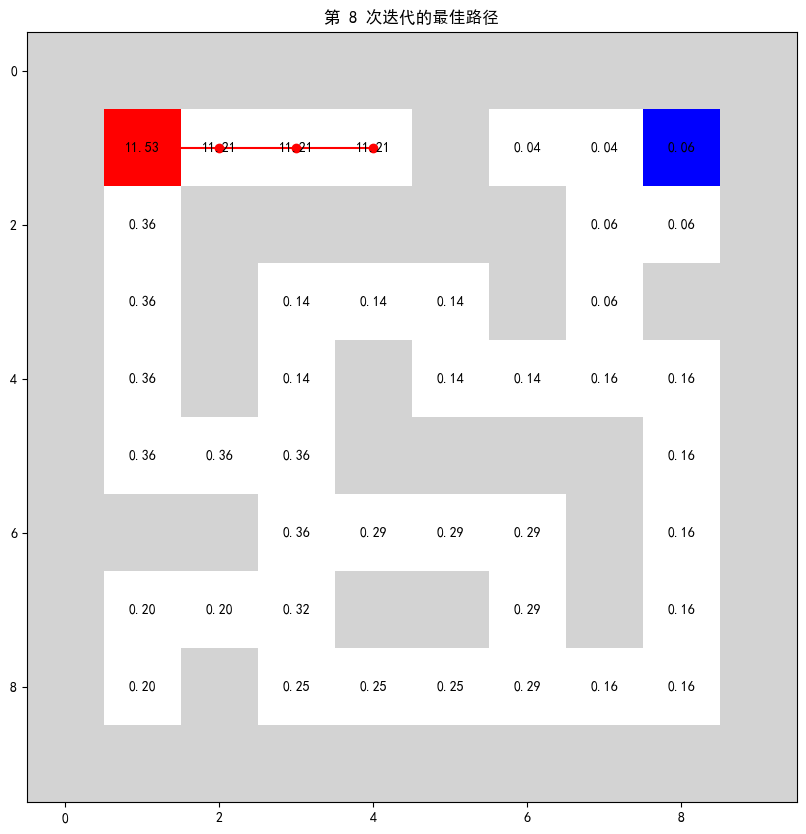

开始第 9 次迭代


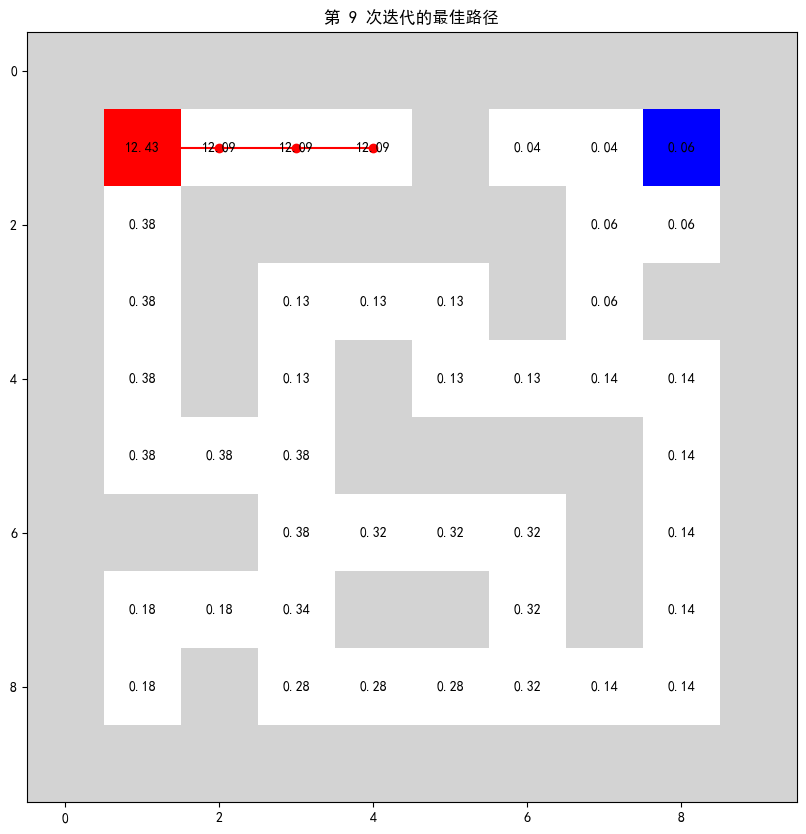

开始第 10 次迭代


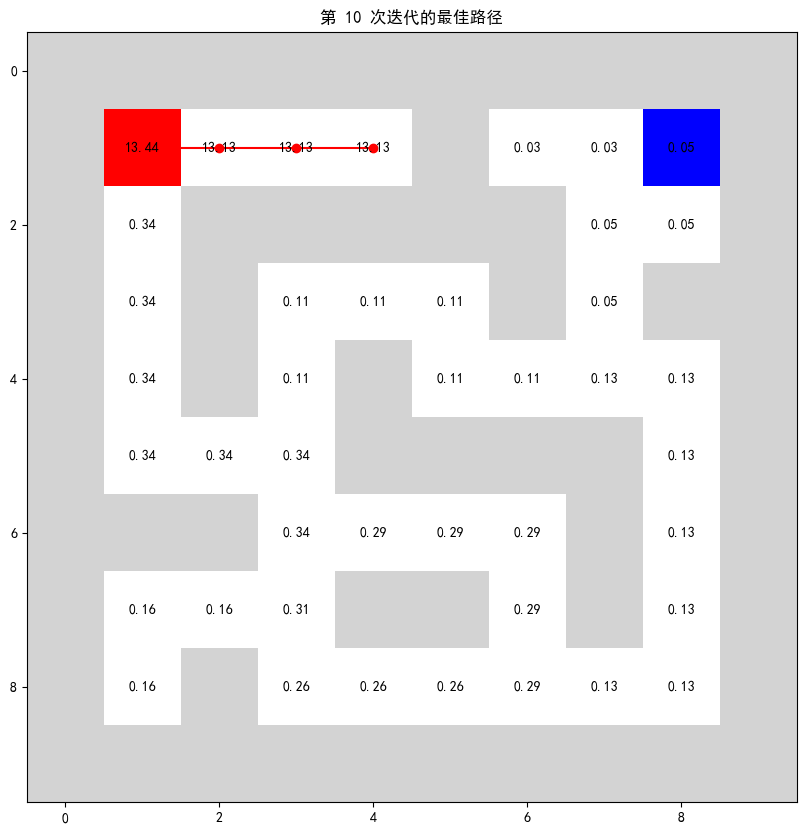

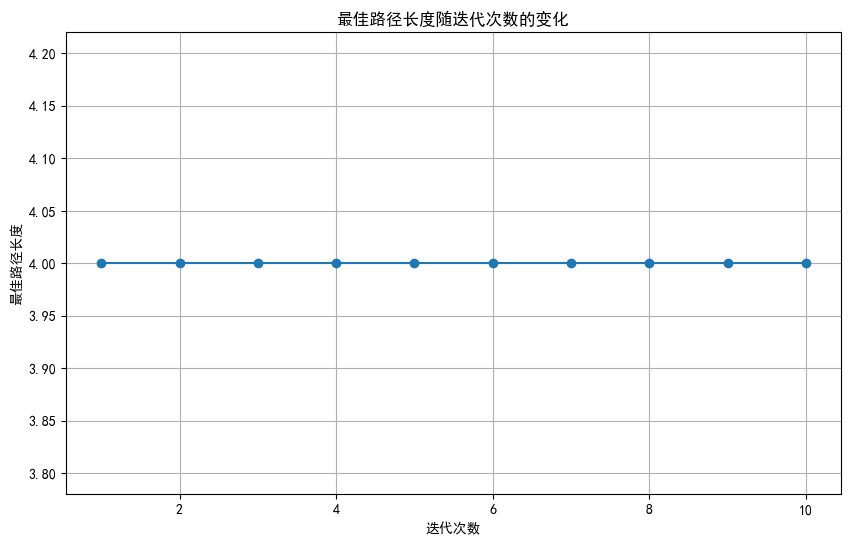

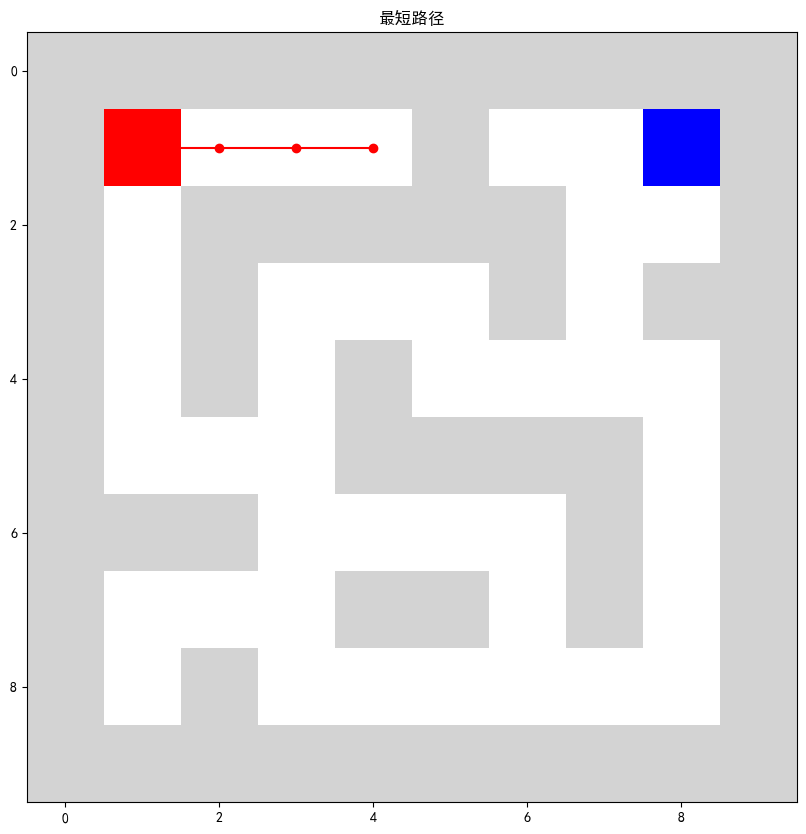

ACO找到最短路径: [(1, 1), (1, 2), (1, 3), (1, 4)]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

class AntColony:
    def __init__(self, maze, n_ants, n_iterations, decay, alpha=1, beta=1):
        self.maze = np.array(maze)
        self.start = tuple(np.argwhere(self.maze == 3)[0])
        self.end = tuple(np.argwhere(self.maze == 9)[0])
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = np.ones(self.maze.shape) * 0.1
        self.pheromone[self.maze == 1] = 0
        print("蚁群初始化完成。")
        self.best_lengths = []
        self.pheromone_history = []
        self.best_paths = []

    def run(self):
        shortest_path = None
        best_length = float('inf')
        for iteration in range(self.n_iterations):
            paths = []
            path_lengths = []
            print(f"开始第 {iteration + 1} 次迭代")
            for ant in range(self.n_ants):
                path, length = self.construct_path()
                paths.append(path)
                path_lengths.append(length)
                if length < best_length:
                    best_length = length
                    shortest_path = path
                # print(f"蚂蚁 {ant + 1}: 路径长度 = {length}")
            self.update_pheromone(paths, path_lengths)
            self.best_lengths.append(best_length)
            self.pheromone_history.append(self.pheromone.copy())
            self.best_paths.append(shortest_path)
            self.visualize_pheromone(iteration, shortest_path)
            # print(f"迭代 {iteration + 1} 结束, 最佳路径长度: {best_length}")
        self.visualize_iterations()
        self.visualize_best_path(shortest_path)
        return shortest_path, best_length

    def construct_path(self):
        path = [self.start]
        visited = set(path)
        current = self.start
        while current != self.end:
            next_moves = self.possible_moves(current, visited)
            if not next_moves:
                break  # 避免死循环
            next_move = self.choose_next_move(next_moves)
            path.append(next_move)
            visited.add(next_move)
            current = next_move
        return path, len(path)

    def possible_moves(self, current, visited):
        moves = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in directions:
            nx, ny = current[0] + dx, current[1] + dy
            if (nx, ny) not in visited and 0 <= nx < self.maze.shape[0] and 0 <= ny < self.maze.shape[1]:
                if self.maze[nx, ny] != 1:
                    moves.append((nx, ny))
        return moves

    def choose_next_move(self, moves):
        probabilities = [self.pheromone[move] ** self.alpha * ((1.0 / (1 + self.maze[move])) ** self.beta) for move in moves]
        probabilities_sum = sum(probabilities)
        probabilities = [p / probabilities_sum for p in probabilities]
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if r < cumulative_probability:
                return moves[i]

    def update_pheromone(self, paths, path_lengths):
        self.pheromone *= (1 - self.decay)
        for path, length in zip(paths, path_lengths):
            for step in path:
                self.pheromone[step] += (1.0 / length)

    def visualize_pheromone(self, iteration, best_path):
        plt.figure(figsize=(10, 10))
        cmap = mcolors.ListedColormap(['white', 'lightgrey', 'red', 'blue', 'yellow'])
        bounds = [0, 0.9, 1.1, 3.1, 9.1, 10]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)
        
        display_maze = self.maze.copy()
        display_maze[self.start] = 3
        display_maze[self.end] = 9
        
        plt.imshow(display_maze, cmap=cmap, norm=norm)
        # plt.title(f'第 {iteration + 1} 次迭代的信息素分布')
        plt.title(f'第 {iteration + 1} 次迭代的最佳路径')

        
        for x in range(self.pheromone.shape[0]):
            for y in range(self.pheromone.shape[1]):
                if self.pheromone[x, y] > 0:
                    plt.text(y, x, f'{self.pheromone[x, y]:.2f}', color='black', ha='center', va='center')
        
        path_x = [x[1] for x in best_path]
        path_y = [x[0] for x in best_path]
        plt.plot(path_x, path_y, marker='o', color='red')
        
        plt.show()

    def visualize_iterations(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.best_lengths) + 1), self.best_lengths, marker='o')
        plt.title('最佳路径长度随迭代次数的变化')
        plt.xlabel('迭代次数')
        plt.ylabel('最佳路径长度')
        plt.grid(True)
        plt.show()

    def visualize_best_path(self, best_path):
        plt.figure(figsize=(10, 10))
        cmap = mcolors.ListedColormap(['white', 'lightgrey', 'red', 'blue', 'yellow'])
        bounds = [0, 0.9, 1.1, 3.1, 9.1, 10]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)
        
        display_maze = self.maze.copy()
        display_maze[self.start] = 3
        display_maze[self.end] = 9
        
        plt.imshow(display_maze, cmap=cmap, norm=norm)
        plt.title('最短路径')
        
        path_x = [x[1] for x in best_path]
        path_y = [x[0] for x in best_path]
        plt.plot(path_x, path_y, marker='o', color='red')
        
        plt.show()
# maze=   [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#          [1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
#          [1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1],
#          [1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1],
#          [1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1],
#          [1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1],
#          [1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1],
#          [1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1],
#          [1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1],
#          [3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,9],
#          [1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1],
#          [1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1],
#          [1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,0,1],
#          [1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1],
#          [1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1],
#          [1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1],
#          [1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,0,1,0,0,1,0,1],
#          [1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1],
#          [1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1],
#          [1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1],
#          [1,0,1,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,1],
#          [1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,1,1],
#          [1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,0,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1],
#          [1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1],
#          [1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1],
#          [1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1],
#          [1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1],
#          [1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
#          [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
# ant_colony = AntColony(maze, n_ants=1000, n_iterations=2000, decay=0.1, alpha=1, beta=1)

# # 定义小型迷宫
# small_maze = [
#     [1, 1, 1, 1, 1, 1],
#     [1, 3, 0, 0, 9, 1],
#     [1, 0, 1, 0, 0, 1],
#     [1, 0, 1, 1, 0, 1],
#     [1, 0, 0, 0, 0, 1],
#     [1, 1, 1, 1, 1, 1]
# ]


small_maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 3, 0, 0, 0, 1, 0, 0, 9, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

# 初始化蚁群系统并运行
ant_colony = AntColony(small_maze, n_ants=9, n_iterations=10, decay=0.1, alpha=1, beta=1)
shortest_path, length = ant_colony.run()
print("ACO找到最短路径:", shortest_path)


# 下面是一个只显示最佳路径的迷宫

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

class AntColony:
    def __init__(self, maze, n_ants, n_iterations, decay, alpha=1, beta=1):
        self.maze = np.array(maze)
        self.start = tuple(np.argwhere(self.maze == 3)[0])
        self.end = tuple(np.argwhere(self.maze == 9)[0])
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = np.ones(self.maze.shape) * 0.1
        self.pheromone[self.maze == 1] = 0
        print("蚁群初始化完成。")
        self.best_lengths = []
        self.pheromone_history = []
        self.best_path = None

    def run(self):
        best_length = float('inf')
        for iteration in range(self.n_iterations):
            paths = []
            path_lengths = []
            print(f"开始第 {iteration + 1} 次迭代")
            for ant in range(self.n_ants):
                path, length = self.construct_path()
                paths.append(path)
                path_lengths.append(length)
                if length < best_length:
                    best_length = length
                    self.best_path = path
                # print(f"蚂蚁 {ant + 1}: 路径长度 = {length}")
            self.update_pheromone(paths, path_lengths)
            self.best_lengths.append(best_length)
            self.pheromone_history.append(self.pheromone.copy())
            # print(f"迭代 {iteration + 1} 结束, 最佳路径长度: {best_length}")
        self.visualize_iterations()
        self.visualize_best_path()
        return self.best_path, best_length

    def construct_path(self):
        path = [self.start]
        visited = set(path)
        current = self.start
        while current != self.end:
            next_moves = self.possible_moves(current, visited)
            if not next_moves:
                break  # 避免死循环
            next_move = self.choose_next_move(next_moves)
            path.append(next_move)
            visited.add(next_move)
            current = next_move
        return path, len(path)

    def possible_moves(self, current, visited):
        moves = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in directions:
            nx, ny = current[0] + dx, current[1] + dy
            if (nx, ny) not in visited and 0 <= nx < self.maze.shape[0] and 0 <= ny < self.maze.shape[1]:
                if self.maze[nx, ny] != 1:
                    moves.append((nx, ny))
        return moves

    def choose_next_move(self, moves):
        probabilities = [self.pheromone[move] ** self.alpha * ((1.0 / (1 + self.maze[move])) ** self.beta) for move in moves]
        probabilities_sum = sum(probabilities)
        probabilities = [p / probabilities_sum for p in probabilities]
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if r < cumulative_probability:
                return moves[i]

    def update_pheromone(self, paths, path_lengths):
        self.pheromone *= (1 - self.decay)
        for path, length in zip(paths, path_lengths):
            for step in path:
                self.pheromone[step] += (1.0 / length)

    def visualize_iterations(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.best_lengths) + 1), self.best_lengths, marker='o')
        plt.title('最佳路径长度随迭代次数的变化')
        plt.xlabel('迭代次数')
        plt.ylabel('最佳路径长度')
        plt.grid(True)
        plt.show()

    def visualize_best_path(self):
        plt.figure(figsize=(10, 10))
        cmap = mcolors.ListedColormap(['black', 'white', 'red', 'blue', 'yellow'])
        bounds = [0, 0.9, 1.1, 3.1, 9.1, 10]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)
        
        display_maze = self.maze.copy()
        display_maze[self.start] = 3
        display_maze[self.end] = 9
        
        plt.imshow(display_maze, cmap=cmap, norm=norm)
        plt.title('最短路径')
        
        path_x = [x[1] for x in self.best_path]
        path_y = [x[0] for x in self.best_path]
        plt.plot(path_x, path_y, marker='o', color='red')
        
        for i, (x, y) in enumerate(zip(path_y, path_x)):
            plt.text(y, x, str(i), color='blue', ha='center', va='center')

        plt.show()
large_maze=   [
         [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
         [1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
         [1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1],
         [1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1],
         [1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1],
         [1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1],
         [1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1],
         [1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1],
         [1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1],
         [3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,9],
         [1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1],
         [1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1],
         [1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,0,1],
         [1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1],
         [1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1],
         [1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1],
         [1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,0,1,0,0,1,0,1],
         [1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1],
         [1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1],
         [1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1],
         [1,0,1,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
         [1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
         [1,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
         [1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
         [1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
         [1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,1],
         [1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1],
         [1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1],
         [1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1],
         [1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,1,1],
         [1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1],
         [1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,0,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,1],
         [1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1],
         [1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,1],
         [1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1],
         [1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1],
         [1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1],
         [1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1],
         [1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1],
         [1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1],
         [1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
]
ant_colony = AntColony(large_maze, n_ants=1500, n_iterations=500, decay=0.1, alpha=7, beta=9)

# # 定义中等迷宫 25x25
# medium_maze = [
#     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 9, 1],
#     [1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1],
#     [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
#     [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
#     [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
#     [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
#     [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
#     [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1],
#     [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
#     [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
#     [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1],
#     [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
#     [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
#     [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1],
#     [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1],
#     [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
#     [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
#     [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
#     [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
#     [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# ]

# # 初始化蚁群系统并运行
# ant_colony = AntColony(medium_maze, n_ants=1500, n_iterations=500, decay=0.1, alpha=7, beta=9)
shortest_path, length = ant_colony.run()
print("ACO找到最短路径:", shortest_path)


蚁群初始化完成。
开始第 1 次迭代


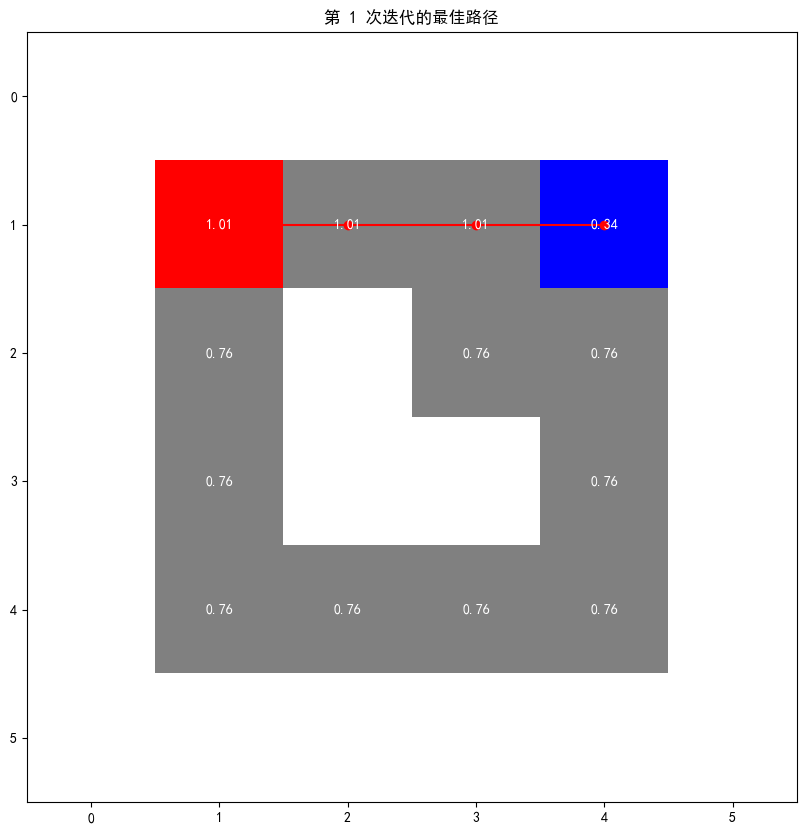

开始第 2 次迭代


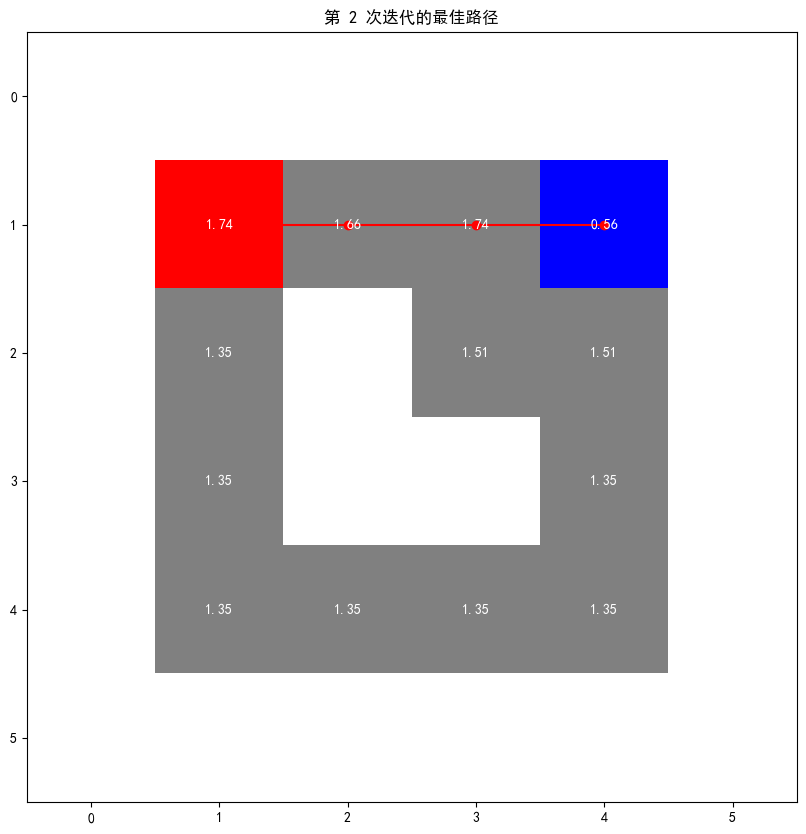

开始第 3 次迭代


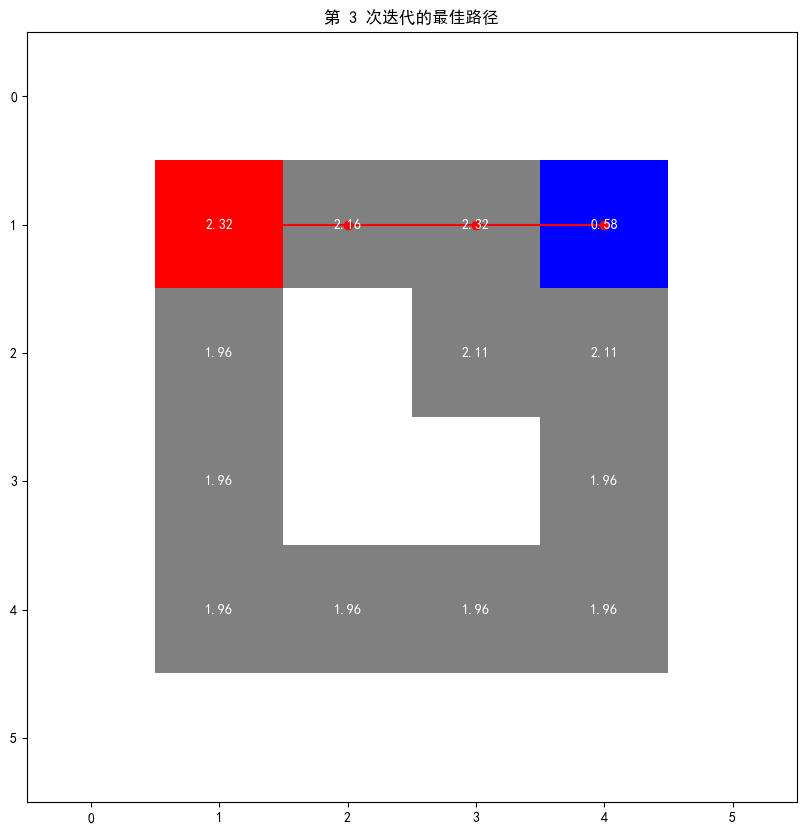

开始第 4 次迭代


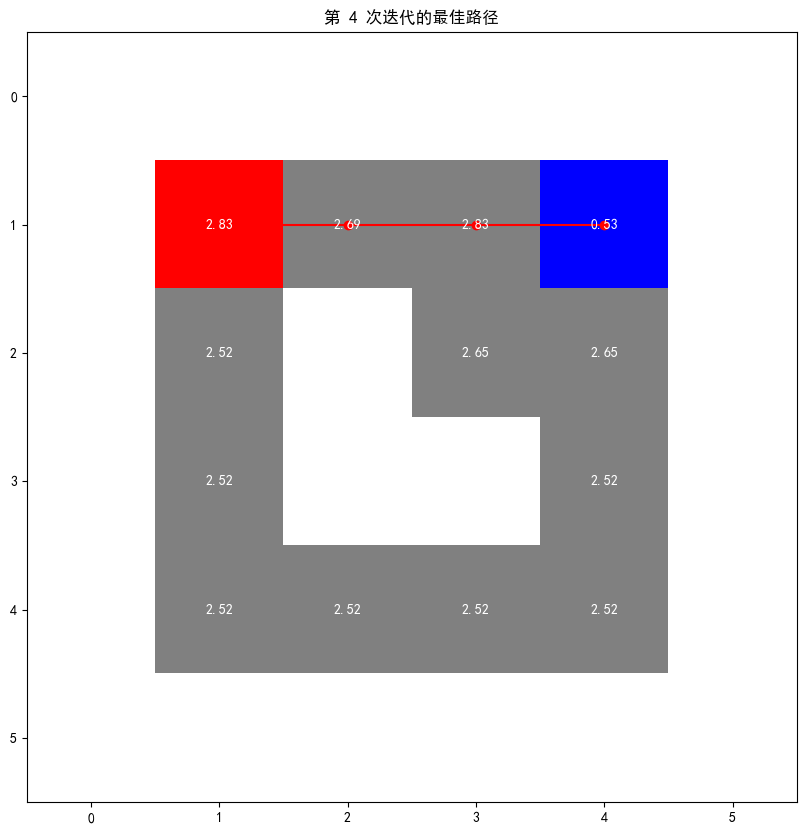

开始第 5 次迭代


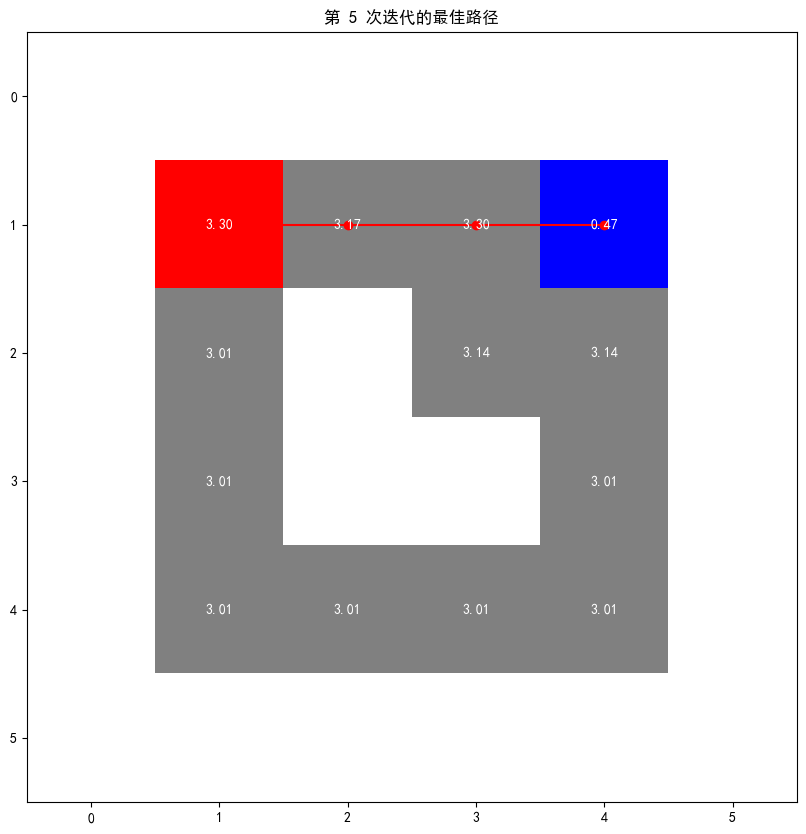

开始第 6 次迭代


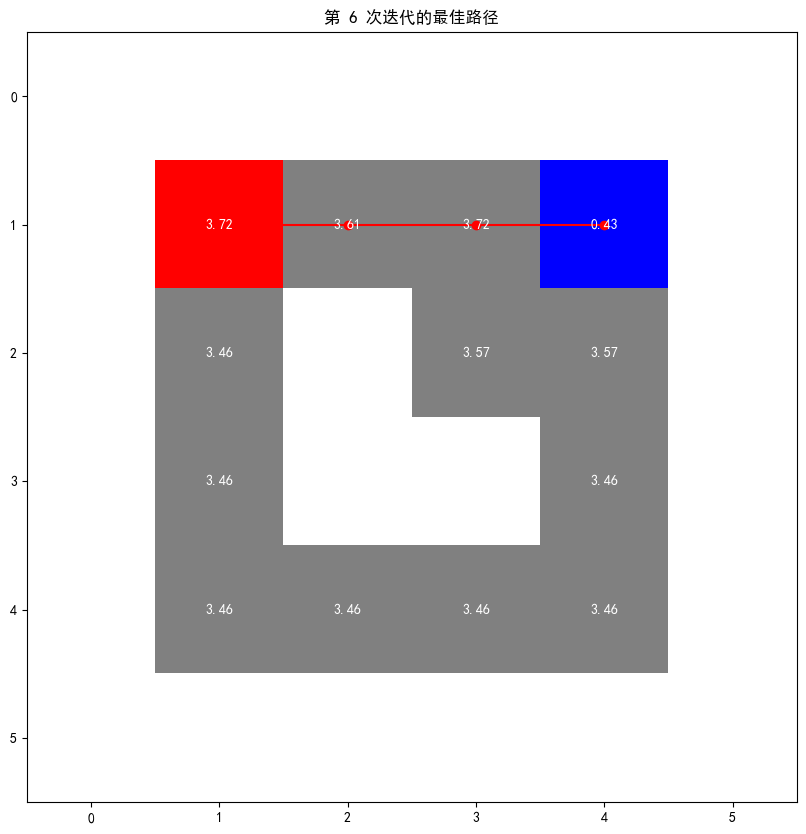

开始第 7 次迭代


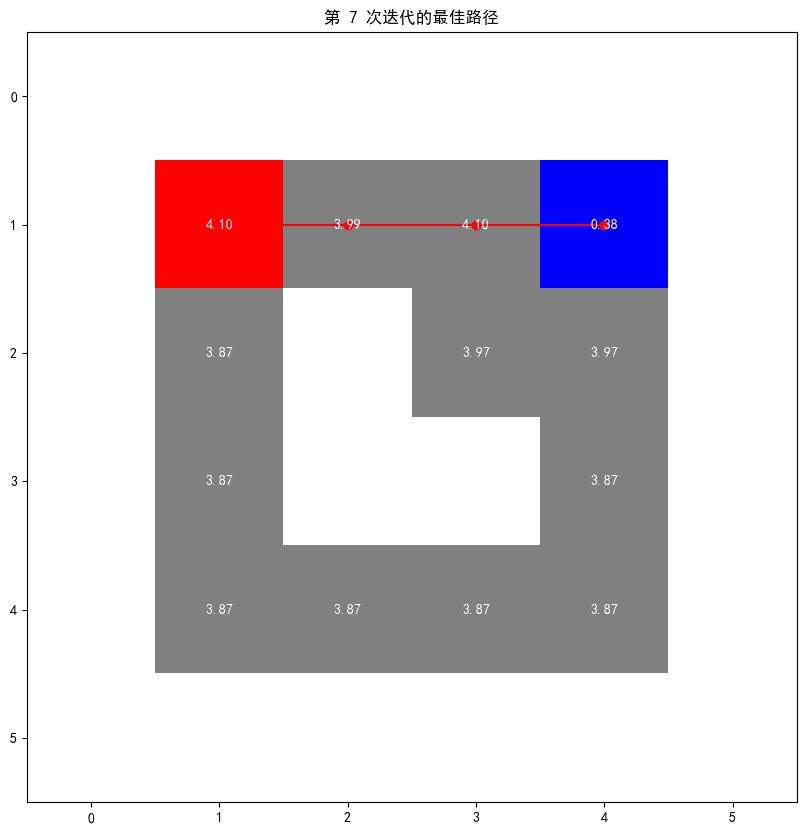

开始第 8 次迭代


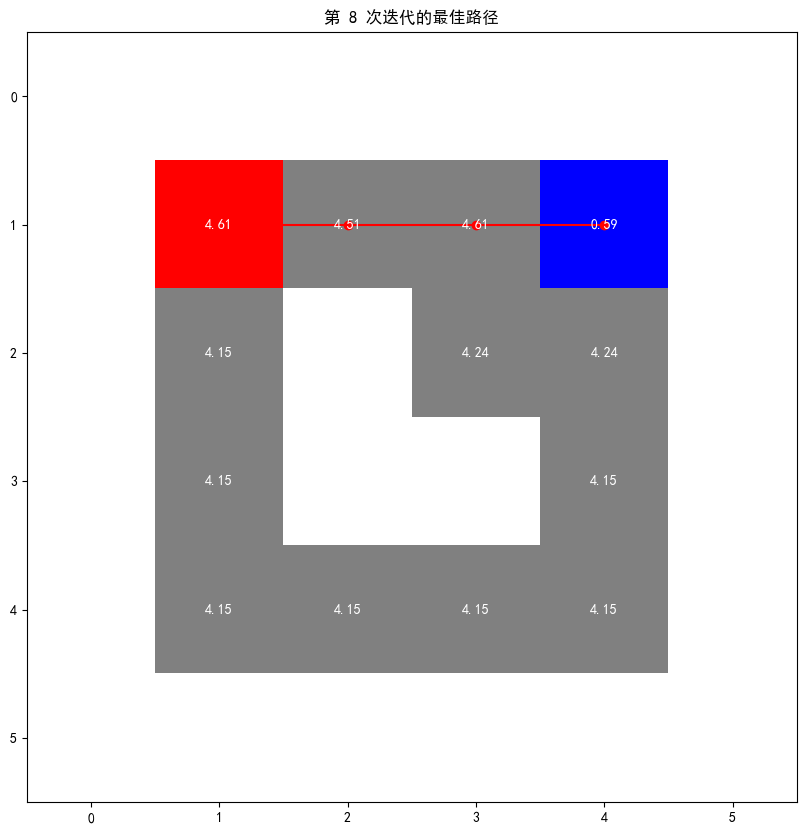

开始第 9 次迭代


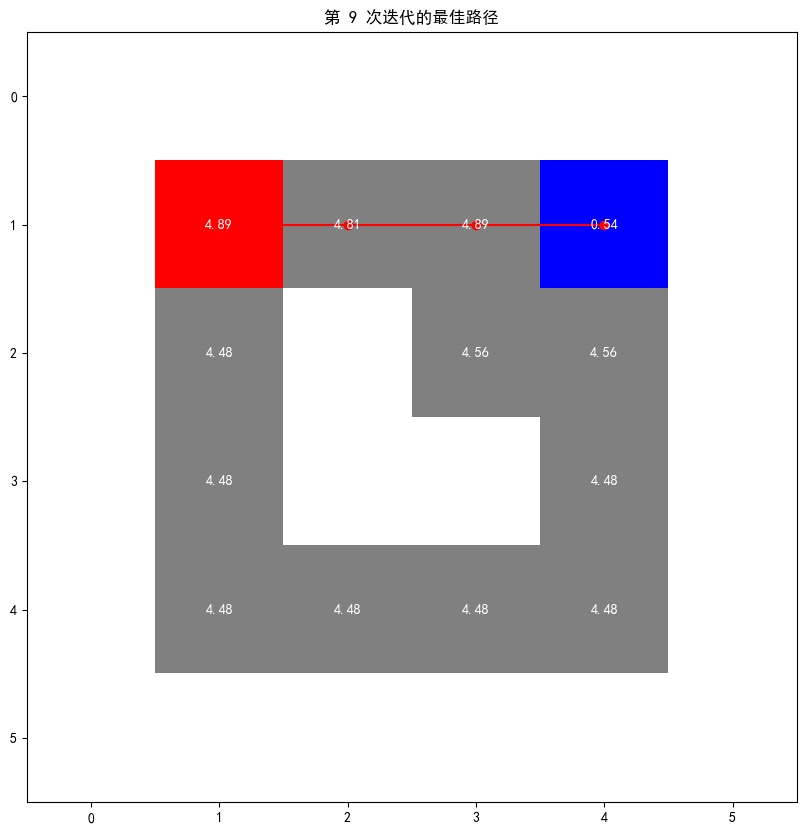

开始第 10 次迭代


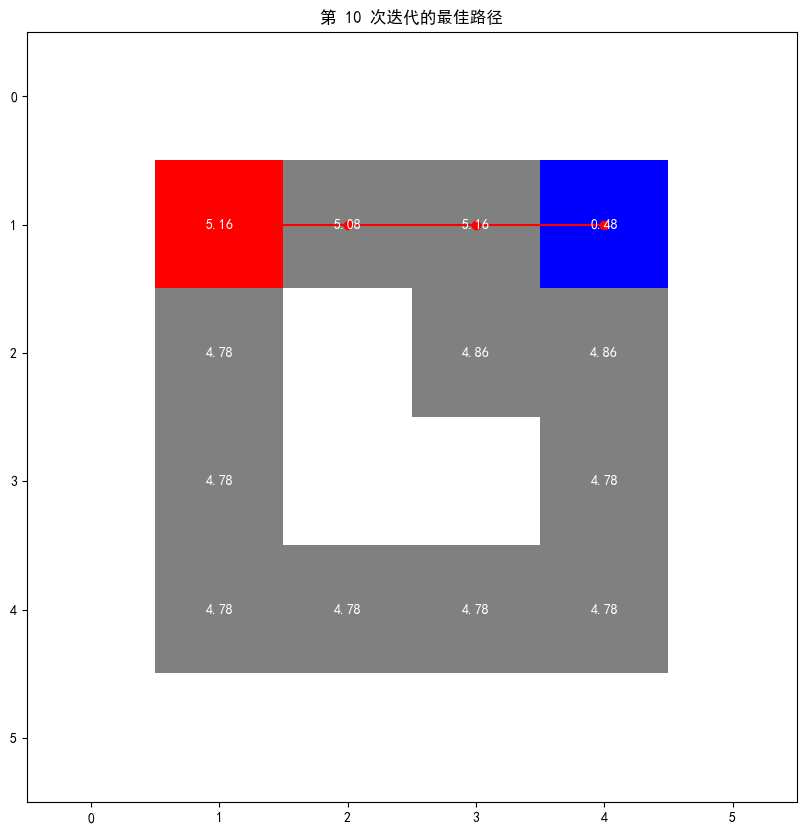

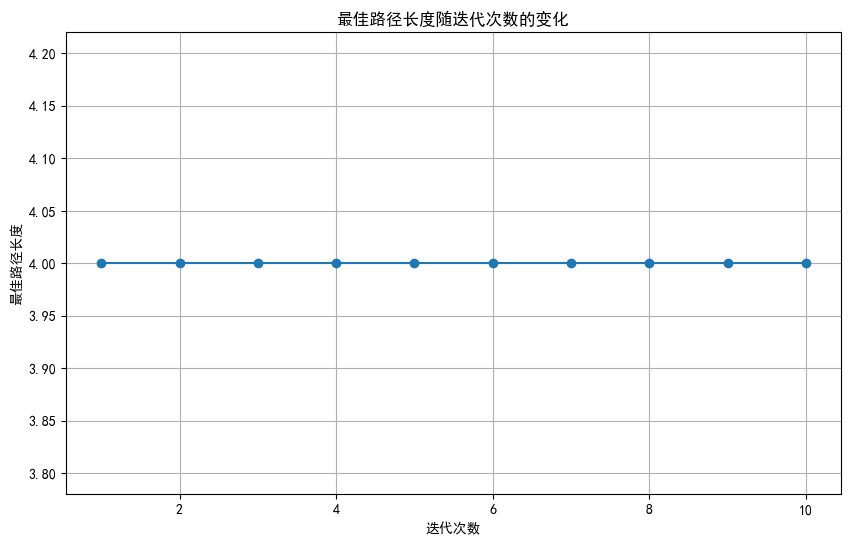

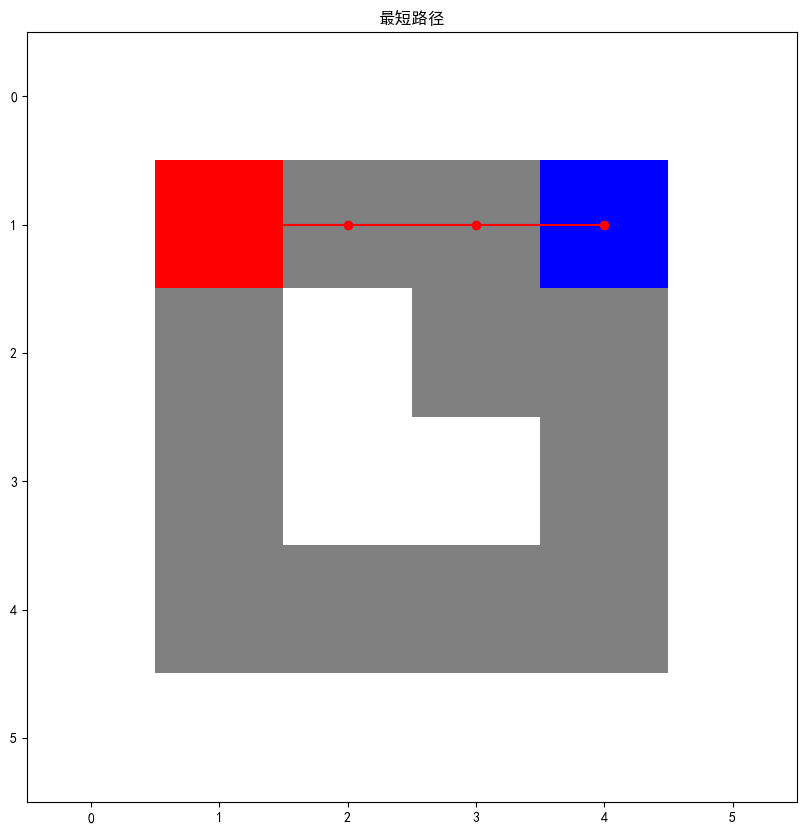

ACO找到最短路径: [(1, 1), (1, 2), (1, 3), (1, 4)]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

class AntColony:
    def __init__(self, maze, n_ants, n_iterations, decay, alpha=1, beta=1):
        self.maze = np.array(maze)
        self.start = tuple(np.argwhere(self.maze == 3)[0])
        self.end = tuple(np.argwhere(self.maze == 9)[0])
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = np.ones(self.maze.shape) * 0.1
        self.pheromone[self.maze == 1] = 0
        print("蚁群初始化完成。")
        self.best_lengths = []
        self.pheromone_history = []
        self.best_paths = []

    def run(self):
        shortest_path = None
        best_length = float('inf')
        for iteration in range(self.n_iterations):
            paths = []
            path_lengths = []
            print(f"开始第 {iteration + 1} 次迭代")
            for ant in range(self.n_ants):
                path, length = self.construct_path()
                paths.append(path)
                path_lengths.append(length)
                if length < best_length:
                    best_length = length
                    shortest_path = path
                # print(f"蚂蚁 {ant + 1}: 路径长度 = {length}")
            self.update_pheromone(paths, path_lengths)
            self.best_lengths.append(best_length)
            self.pheromone_history.append(self.pheromone.copy())
            self.best_paths.append(shortest_path)
            self.visualize_pheromone(iteration, shortest_path)
            # print(f"迭代 {iteration + 1} 结束, 最佳路径长度: {best_length}")
        self.visualize_iterations()
        self.visualize_best_path(shortest_path)
        return shortest_path, best_length

    def construct_path(self):
        path = [self.start]
        visited = set(path)
        current = self.start
        while current != self.end:
            next_moves = self.possible_moves(current, visited)
            if not next_moves:
                break  # 避免死循环
            next_move = self.choose_next_move(next_moves)
            path.append(next_move)
            visited.add(next_move)
            current = next_move
        return path, len(path)

    def possible_moves(self, current, visited):
        moves = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in directions:
            nx, ny = current[0] + dx, current[1] + dy
            if (nx, ny) not in visited and 0 <= nx < self.maze.shape[0] and 0 <= ny < self.maze.shape[1]:
                if self.maze[nx, ny] != 1:
                    moves.append((nx, ny))
        return moves

    def choose_next_move(self, moves):
        probabilities = [self.pheromone[move] ** self.alpha * ((1.0 / (1 + self.maze[move])) ** self.beta) for move in moves]
        probabilities_sum = sum(probabilities)
        probabilities = [p / probabilities_sum for p in probabilities]
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if r < cumulative_probability:
                return moves[i]

    def update_pheromone(self, paths, path_lengths):
        self.pheromone *= (1 - self.decay)
        for path, length in zip(paths, path_lengths):
            for step in path:
                self.pheromone[step] += (1.0 / length)

    def visualize_pheromone(self, iteration, best_path):
        plt.figure(figsize=(10, 10))
        cmap = mcolors.ListedColormap(['grey', 'white', 'red', 'blue', 'yellow'])
        bounds = [0, 0.9, 1.1, 3.1, 9.1, 10]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)
        
        display_maze = self.maze.copy()
        display_maze[self.start] = 3
        display_maze[self.end] = 9
        
        plt.imshow(display_maze, cmap=cmap, norm=norm)
        # plt.title(f'第 {iteration + 1} 次迭代的信息素分布')
        plt.title(f'第 {iteration + 1} 次迭代的最佳路径')

        
        for x in range(self.pheromone.shape[0]):
            for y in range(self.pheromone.shape[1]):
                if self.pheromone[x, y] > 0:
                    plt.text(y, x, f'{self.pheromone[x, y]:.2f}', color='white', ha='center', va='center')
        
        path_x = [x[1] for x in best_path]
        path_y = [x[0] for x in best_path]
        plt.plot(path_x, path_y, marker='o', color='red')
        
        plt.show()

    def visualize_iterations(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.best_lengths) + 1), self.best_lengths, marker='o')
        plt.title('最佳路径长度随迭代次数的变化')
        plt.xlabel('迭代次数')
        plt.ylabel('最佳路径长度')
        plt.grid(True)
        plt.show()

    def visualize_best_path(self, best_path):
        plt.figure(figsize=(10, 10))
        cmap = mcolors.ListedColormap(['grey', 'white', 'red', 'blue', 'yellow'])
        bounds = [0, 0.9, 1.1, 3.1, 9.1, 10]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)
        
        display_maze = self.maze.copy()
        display_maze[self.start] = 3
        display_maze[self.end] = 9
        
        plt.imshow(display_maze, cmap=cmap, norm=norm)
        plt.title('最短路径')
        
        path_x = [x[1] for x in best_path]
        path_y = [x[0] for x in best_path]
        plt.plot(path_x, path_y, marker='o', color='red')
        
        plt.show()
# maze=   [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#          [1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
#          [1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1],
#          [1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1],
#          [1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1],
#          [1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1],
#          [1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1],
#          [1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1],
#          [1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1],
#          [3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,9],
#          [1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1],
#          [1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1],
#          [1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,0,1],
#          [1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1],
#          [1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1],
#          [1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1],
#          [1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,0,1,0,0,1,0,1],
#          [1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1],
#          [1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1],
#          [1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1],
#          [1,0,1,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,1],
#          [1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,1,1],
#          [1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,0,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1],
#          [1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1],
#          [1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1],
#          [1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1],
#          [1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1],
#          [1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1],
#          [1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
#          [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
# ant_colony = AntColony(maze, n_ants=1000, n_iterations=2000, decay=0.1, alpha=1, beta=1)

# # 定义小型迷宫
small_maze = [
    [1, 1, 1, 1, 1, 1],
    [1, 3, 0, 0, 9, 1],
    [1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1]
]

# 初始化蚁群系统并运行
ant_colony = AntColony(small_maze, n_ants=9, n_iterations=10, decay=0.1, alpha=1, beta=1)
shortest_path, length = ant_colony.run()
print("ACO找到最短路径:", shortest_path)


蚁群初始化完成。
开始第 1 次迭代


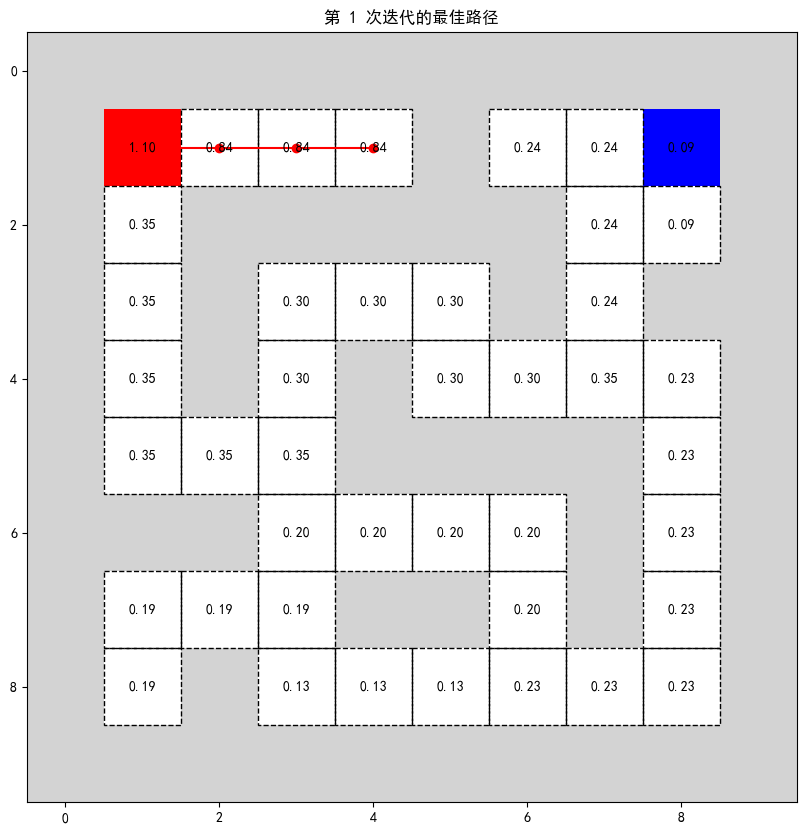

开始第 2 次迭代


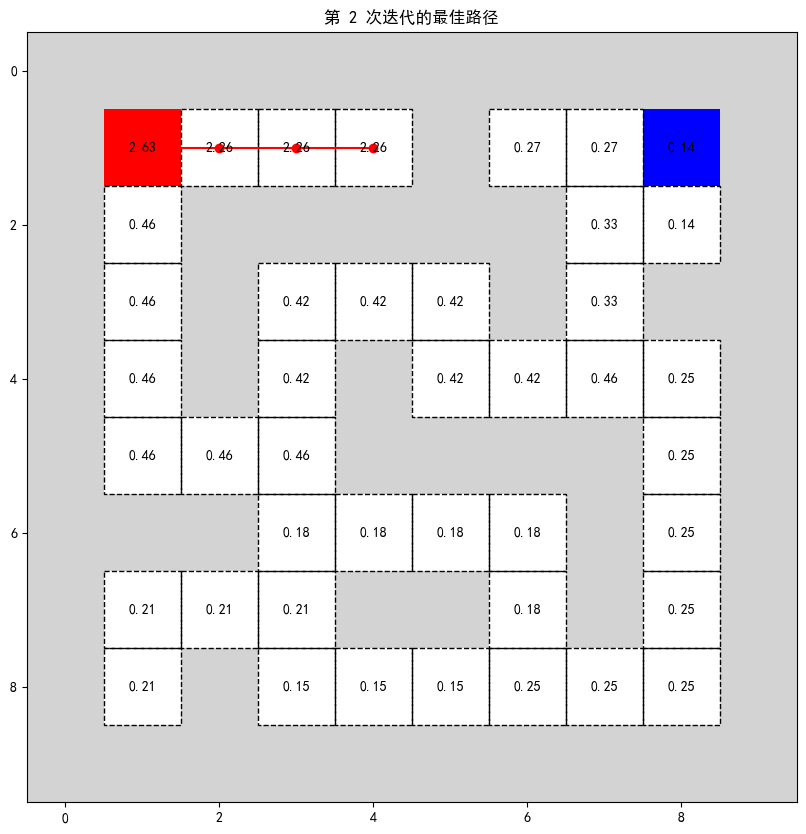

开始第 3 次迭代


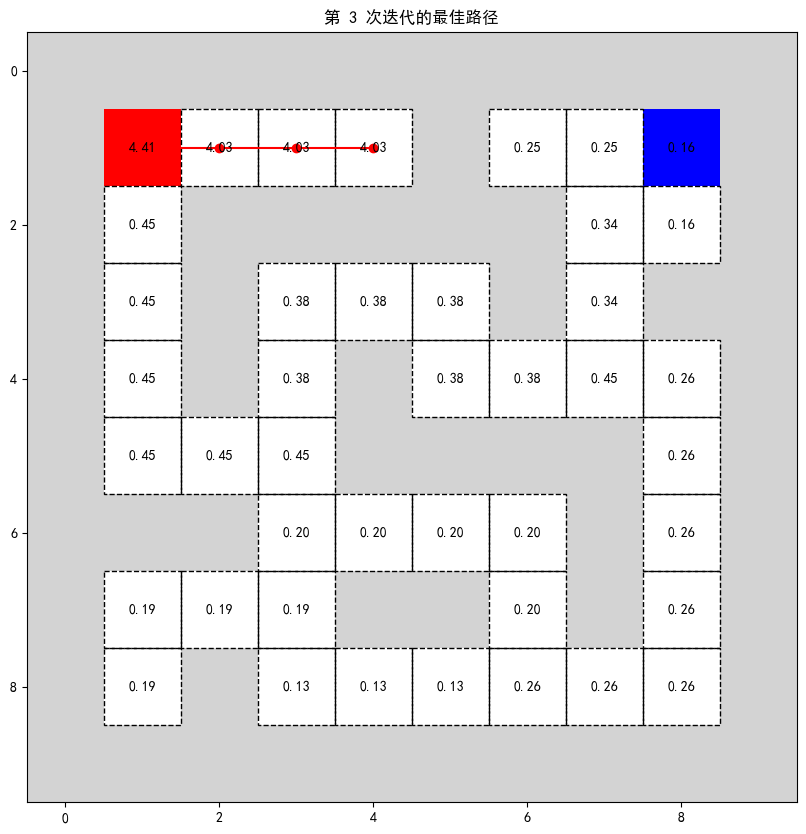

开始第 4 次迭代


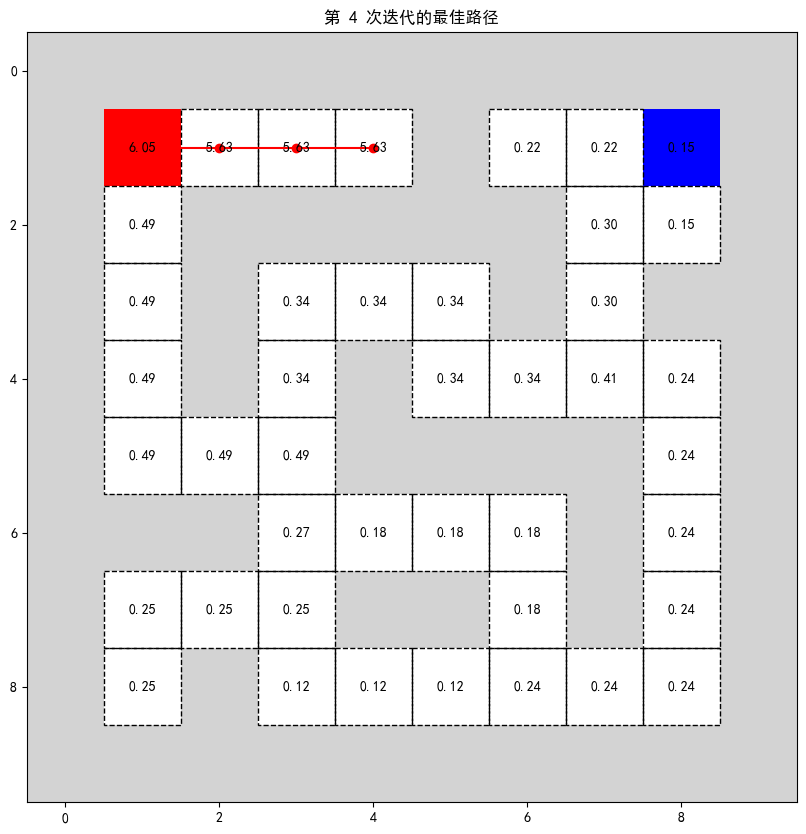

开始第 5 次迭代


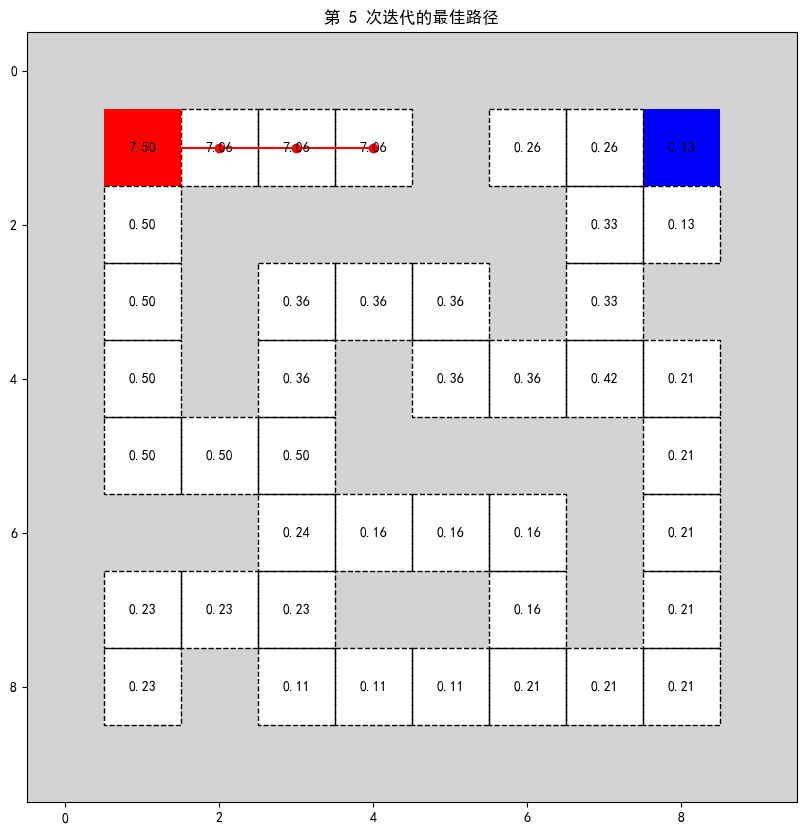

开始第 6 次迭代


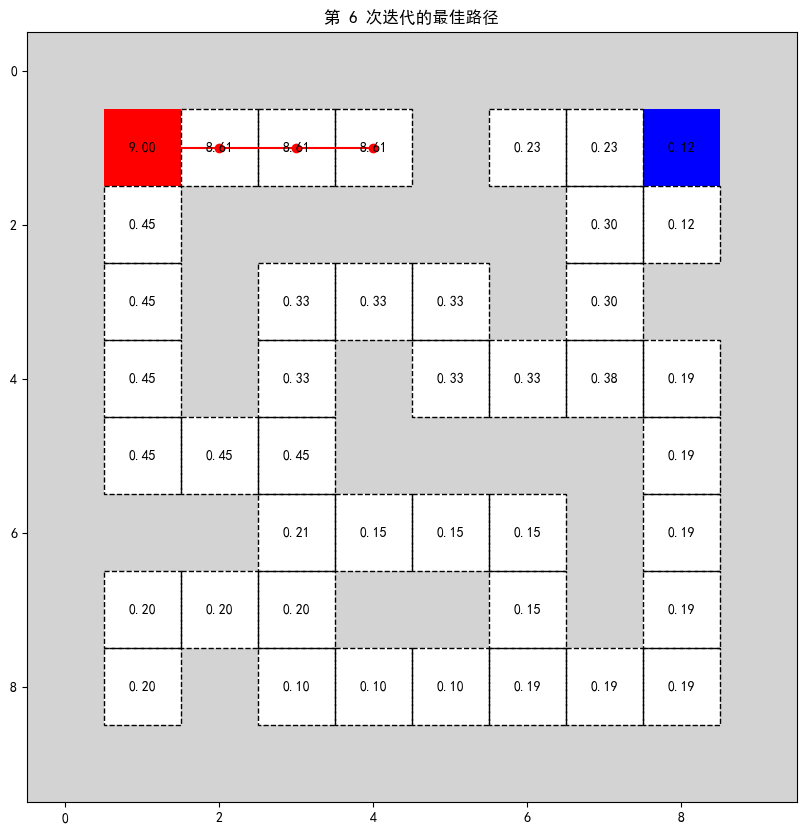

开始第 7 次迭代


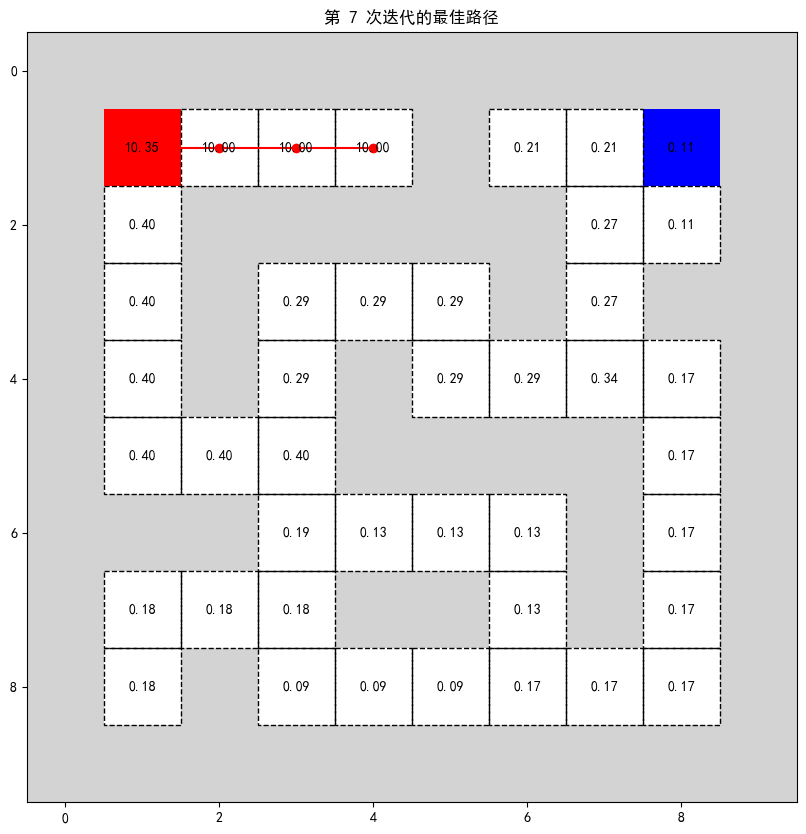

开始第 8 次迭代


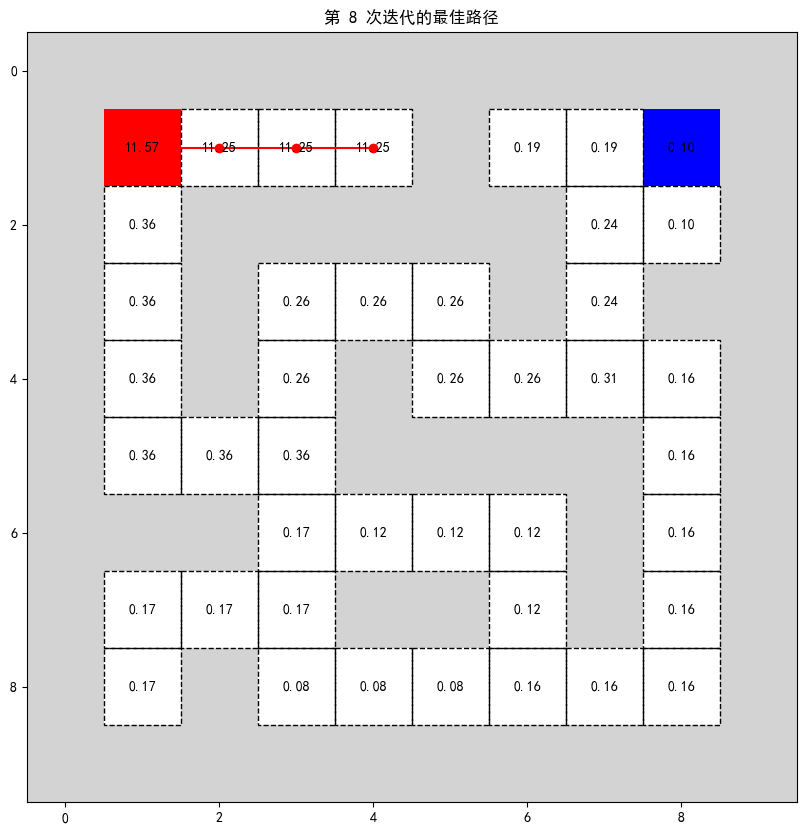

开始第 9 次迭代


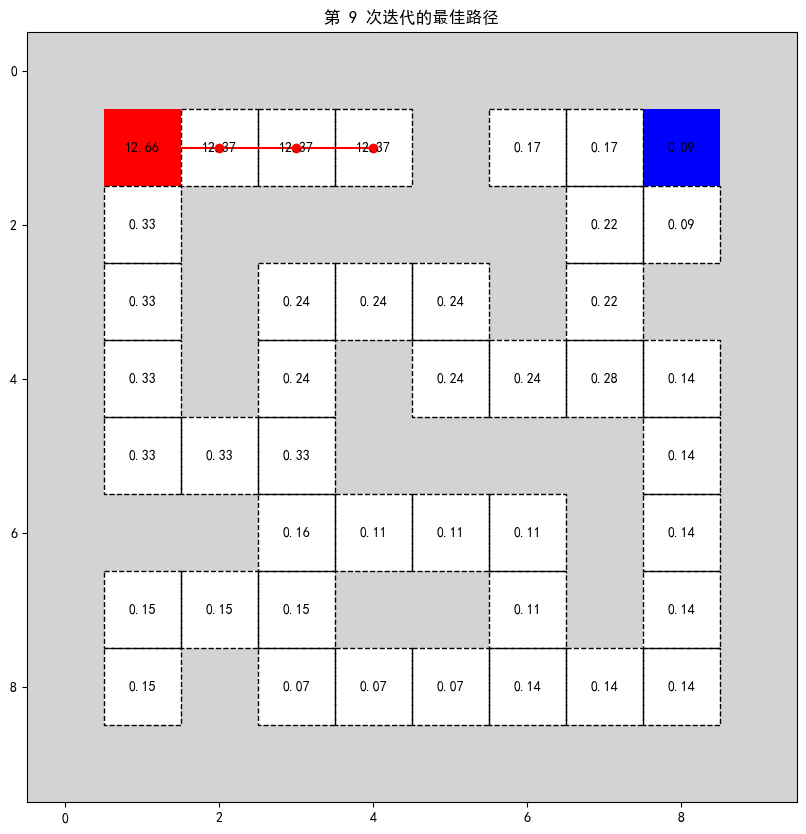

开始第 10 次迭代


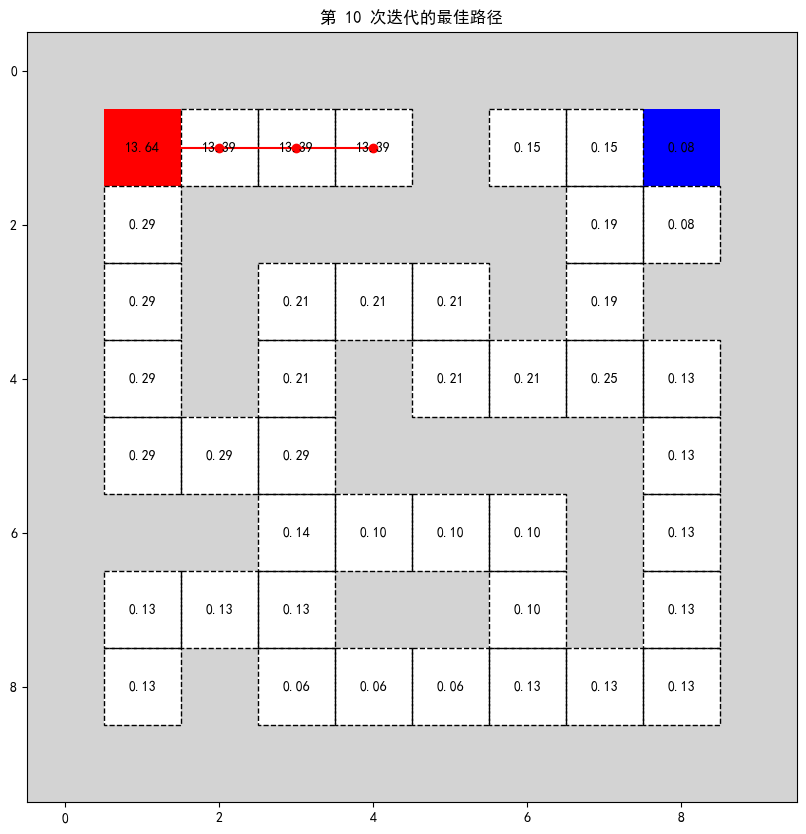

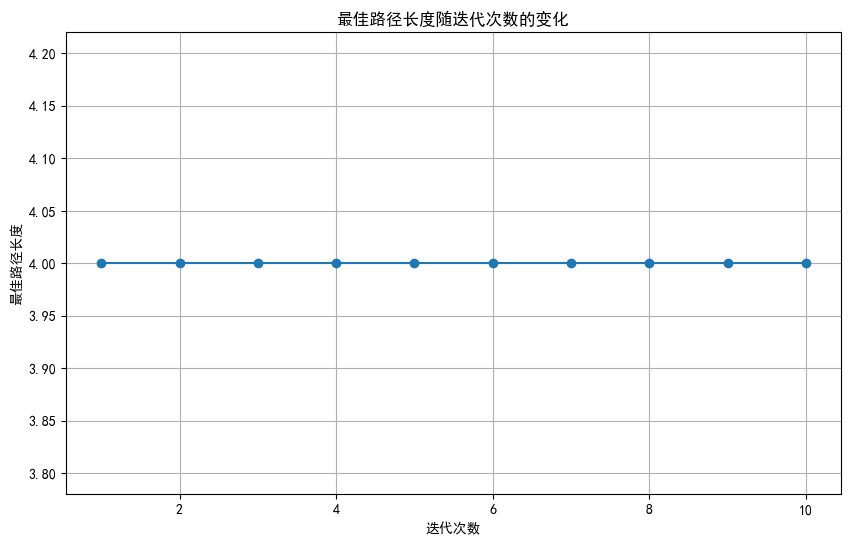

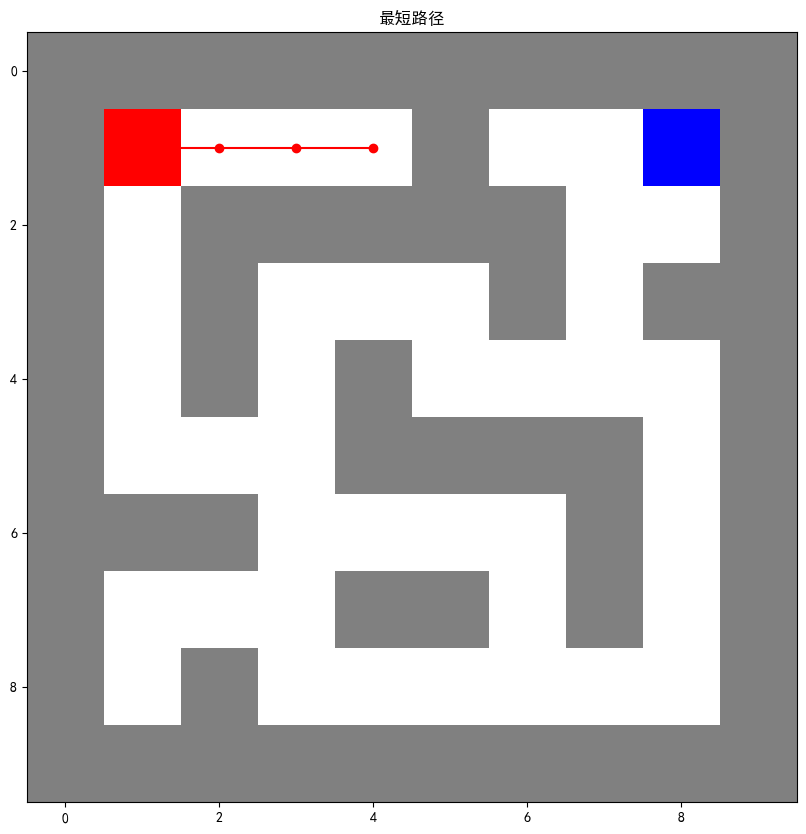

ACO找到最短路径: [(1, 1), (1, 2), (1, 3), (1, 4)]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

class AntColony:
    def __init__(self, maze, n_ants, n_iterations, decay, alpha=1, beta=1):
        self.maze = np.array(maze)
        self.start = tuple(np.argwhere(self.maze == 3)[0])
        self.end = tuple(np.argwhere(self.maze == 9)[0])
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = np.ones(self.maze.shape) * 0.1
        self.pheromone[self.maze == 1] = 0
        print("蚁群初始化完成。")
        self.best_lengths = []
        self.pheromone_history = []
        self.best_paths = []

    def run(self):
        shortest_path = None
        best_length = float('inf')
        for iteration in range(self.n_iterations):
            paths = []
            path_lengths = []
            print(f"开始第 {iteration + 1} 次迭代")
            for ant in range(self.n_ants):
                path, length = self.construct_path()
                paths.append(path)
                path_lengths.append(length)
                if length < best_length:
                    best_length = length
                    shortest_path = path
            self.update_pheromone(paths, path_lengths)
            self.best_lengths.append(best_length)
            self.pheromone_history.append(self.pheromone.copy())
            self.best_paths.append(shortest_path)
            self.visualize_pheromone(iteration, shortest_path)
        self.visualize_iterations()
        self.visualize_best_path(shortest_path)
        return shortest_path, best_length

    def construct_path(self):
        path = [self.start]
        visited = set(path)
        current = self.start
        while current != self.end:
            next_moves = self.possible_moves(current, visited)
            if not next_moves:
                break  # 避免死循环
            next_move = self.choose_next_move(next_moves)
            path.append(next_move)
            visited.add(next_move)
            current = next_move
        return path, len(path)

    def possible_moves(self, current, visited):
        moves = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in directions:
            nx, ny = current[0] + dx, current[1] + dy
            if (nx, ny) not in visited and 0 <= nx < self.maze.shape[0] and 0 <= ny < self.maze.shape[1]:
                if self.maze[nx, ny] != 1:
                    moves.append((nx, ny))
        return moves

    def choose_next_move(self, moves):
        probabilities = [self.pheromone[move] ** self.alpha * ((1.0 / (1 + self.maze[move])) ** self.beta) for move in moves]
        probabilities_sum = sum(probabilities)
        probabilities = [p / probabilities_sum for p in probabilities]
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if r < cumulative_probability:
                return moves[i]

    def update_pheromone(self, paths, path_lengths):
        self.pheromone *= (1 - self.decay)
        for path, length in zip(paths, path_lengths):
            for step in path:
                self.pheromone[step] += (1.0 / length)

    def visualize_pheromone(self, iteration, best_path):
        plt.figure(figsize=(10, 10))
        cmap = mcolors.ListedColormap(['white', 'lightgrey', 'red', 'blue', 'yellow'])
        bounds = [0, 0.9, 1.1, 3.1, 9.1, 10]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)
        
        display_maze = self.maze.copy()
        display_maze[self.start] = 3
        display_maze[self.end] = 9
        
        plt.imshow(display_maze, cmap=cmap, norm=norm)
        plt.title(f'第 {iteration + 1} 次迭代的最佳路径')

        ax = plt.gca()
        for x in range(self.maze.shape[0]):
            for y in range(self.maze.shape[1]):
                if self.maze[x, y] == 0:
                    rect = patches.Rectangle((y-0.5, x-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
                    ax.add_patch(rect)
        
        for x in range(self.pheromone.shape[0]):
            for y in range(self.pheromone.shape[1]):
                if self.pheromone[x, y] > 0:
                    plt.text(y, x, f'{self.pheromone[x, y]:.2f}', color='black', ha='center', va='center')
        
        path_x = [x[1] for x in best_path]
        path_y = [x[0] for x in best_path]
        plt.plot(path_x, path_y, marker='o', color='red')
        
        plt.show()

    def visualize_iterations(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.best_lengths) + 1), self.best_lengths, marker='o')
        plt.title('最佳路径长度随迭代次数的变化')
        plt.xlabel('迭代次数')
        plt.ylabel('最佳路径长度')
        plt.grid(True)
        plt.show()

    def visualize_best_path(self, best_path):
        plt.figure(figsize=(10, 10))
        cmap = mcolors.ListedColormap(['white', 'grey', 'red', 'blue', 'yellow'])
        bounds = [0, 0.9, 1.1, 3.1, 9.1, 10]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)
        
        display_maze = self.maze.copy()
        display_maze[self.start] = 3
        display_maze[self.end] = 9
        
        plt.imshow(display_maze, cmap=cmap, norm=norm)
        plt.title('最短路径')
        
        path_x = [x[1] for x in best_path]
        path_y = [x[0] for x in best_path]
        plt.plot(path_x, path_y, marker='o', color='red')
        
        plt.show()

# 定义10x10迷宫
small_maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 3, 0, 0, 0, 1, 0, 0, 9, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

# 初始化蚁群系统并运行
ant_colony = AntColony(small_maze, n_ants=9, n_iterations=10, decay=0.1, alpha=1, beta=1)
shortest_path, length = ant_colony.run()
print("ACO找到最短路径:", shortest_path)
